In [1]:
from skimage import io
from skimage.filters import gaussian
from skimage.restoration import denoise_nl_means
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
img = io.imread("./1.png", as_gray=True)

In [3]:
denoisedImg = denoise_nl_means(img, fast_mode=True, h=0.2)

denoisedGaussian = gaussian(denoisedImg, 3)

In [4]:
print(denoisedGaussian)

[[0.41128411 0.41473465 0.41853683 ... 0.49271687 0.49322761 0.49389444]
 [0.40997746 0.41332964 0.41707197 ... 0.49285828 0.49338905 0.49406584]
 [0.40780573 0.41098776 0.41461104 ... 0.49297105 0.49353365 0.49422911]
 ...
 [0.62126761 0.61681614 0.61088054 ... 0.66176147 0.66263369 0.66313708]
 [0.62241648 0.61767095 0.61128526 ... 0.66124009 0.66208772 0.6625708 ]
 [0.62377412 0.61880136 0.6120562  ... 0.66079591 0.66163067 0.66210466]]


In [7]:
denoisedGaussian.shape

(858, 891)

In [45]:
def stackfourcolumns(arr) :
    for i in arr:
        i = 0
        a = arr[:, i:i+4]
        i = i + 4
        b = arr[:, i:i+4]
        a = a.mean(axis=1)
        b = b.mean(axis=1)
        new = np.column_stack((a,b))
    return new

In [48]:
stackfourcolumns(denoisedGaussian)

array([[0.41670609, 0.42968413],
       [0.41529677, 0.42850663],
       [0.41293143, 0.42641906],
       ...,
       [0.61311844, 0.57922079],
       [0.6136733 , 0.57750982],
       [0.61455882, 0.57644654]])

In [5]:
# ИЗМЕНИТЬ ЭТУ ПЕРЕМЕННУЮ ЧТОБЫ ПОЛУЧИТЬ ГРАФИК
target_plot = denoisedGaussian
# turn NP array into xyz plot
m,n = target_plot.shape
y,x = np.mgrid[:m,:n]
z = target_plot
#out = np.column_stack((C.ravel(),R.ravel(), denoisedGaussian.ravel()))

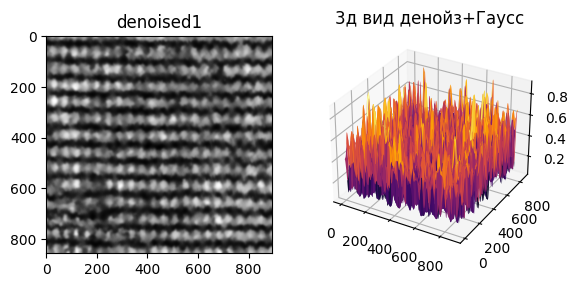

In [6]:
#######################
# ПОСТРОЕНИЕ ГРАФИКОВ #
#######################

fig = plt.figure()

ax=fig.add_subplot(121)
ax.imshow(denoisedGaussian, cmap='gray')
ax.set_title("denoised1")

# ax=fig.add_subplot(212)
# ax.imshow(img, cmap='gray')
# ax.set_title("original")

ax=fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y ,z, cmap ='inferno')
ax.set_title("3д вид денойз+Гаусс")

plt.show()